In [1]:
import pandas as pd

df= pd.read_csv('Data/covid_us_county.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017826 entries, 0 to 3017825
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fips        float64
 1   county      object 
 2   state       object 
 3   lat         float64
 4   long        float64
 5   date        object 
 6   cases       int64  
 7   state_code  object 
 8   deaths      int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 207.2+ MB


,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [2]:
df['state_code'].unique()

array(['AL', 'AK', nan, 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [3]:
check= df[df['state_code'].isna()]
check

,fips,county,state,lat,long,date,cases,state_code,deaths
92106,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-22,0,NaN,0
92107,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-23,0,NaN,0
92108,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-24,0,NaN,0
92109,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-25,0,NaN,0
92110,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-26,0,NaN,0
...,...,...,...,...,...,...,...,...,...
2718025,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-08,21103,NaN,119
2718026,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-09,21103,NaN,119
2718027,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-10,21103,NaN,119
2718028,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-11,21175,NaN,119


In [4]:
check['state'].unique()

array(['American Samoa', 'Diamond Princess', 'District of Columbia',
       'Grand Princess', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

In [5]:
df.loc[ df['state']== 'American Samoa', 'state_code'] = "AS"
df.loc[ df['state']=='District of Columbia', 'state_code'] = "DC"
df.loc[ df['state']== 'Guam', 'state_code'] = "GU"
df.loc[ df['state']== 'Northern Mariana Islands ', 'state_code'] = "MP"
df.loc[ df['state']=='Puerto Rico', 'state_code'] = "PR"
df.loc[ df['state']=='Virgin Islands', 'state_code'] = "VI"
df.loc[ (df['state']=='Diamond Princess') | (df['state']=='Grand Princess'), 'state_code'] = "CR"
## confirming DC is in the state_code column
df['state_code'].unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'CR', 'DC',
       'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', nan, 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [6]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,fips,county,state,lat,long,cases,state_code,deaths
date,,,,,,,,
2020-01-22,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-23,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-24,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-25,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-26,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
...,...,...,...,...,...,...,...,...
2022-07-08,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-09,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-10,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19


In [7]:
# Visualizing Time Series with Different Magnitudes

# drop unneeded columns
df = df.drop(columns=['fips','lat','long'])

In [8]:
## resample as daily freq by state
df_ts = df.groupby("state_code").resample("D").sum()
df_ts

/var/folders/fc/lxtc0_tj33b65krh167ynf300000gn/T/ipykernel_28393/2045514000.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = df.groupby("state_code").resample("D").sum()


cases  deaths
state_code date                      
AK         2020-01-22       0       0
           2020-01-23       0       0
           2020-01-24       0       0
           2020-01-25       0       0
           2020-01-26       0       0
...                       ...     ...
WY         2022-07-08  165619    1834
           2022-07-09  165619    1834
           2022-07-10  165619    1834
           2022-07-11  165619    1834
           2022-07-12  167386    1845

[50568 rows x 2 columns]

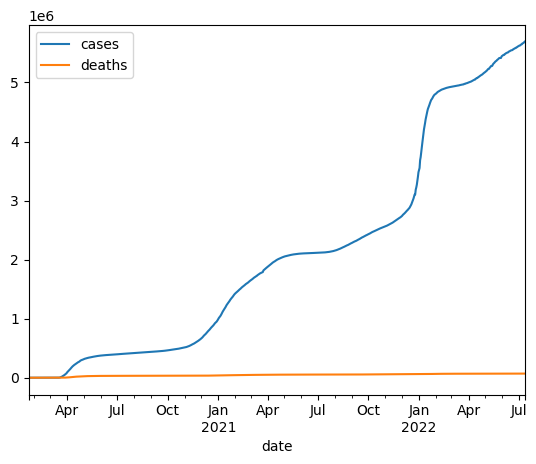

In [9]:
state_ts = df_ts.loc['NY'].copy()
ax = state_ts.plot();

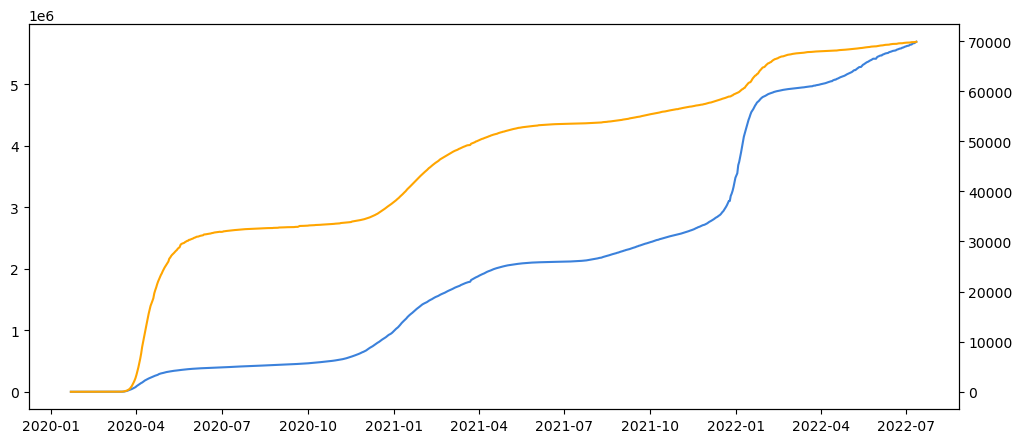

In [10]:
# Using twin axes


from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,5))
## Plot first line on original ax
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
# Make twin axis and plot second line
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')

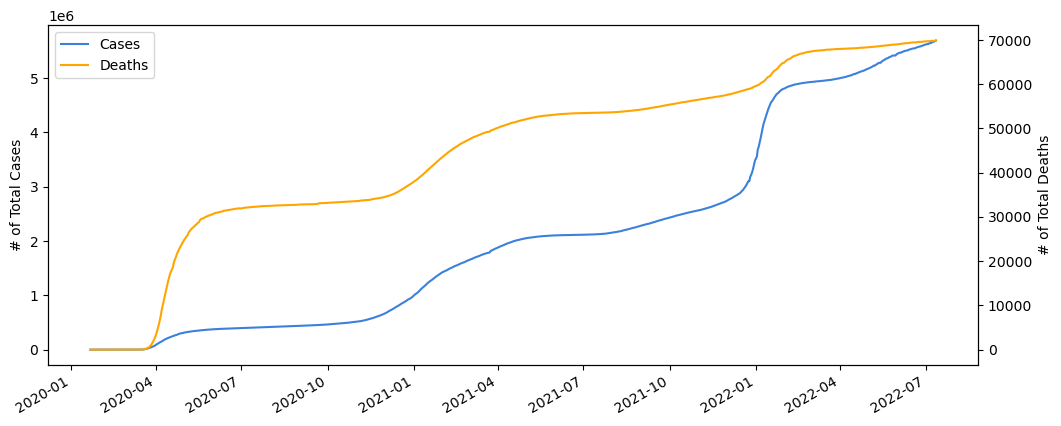

In [11]:
# Solution for having two legends
# Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
ax1.set_ylabel("# of Total Cases")
# Make twin axis
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')
ax2.set_ylabel("# of Total Deaths")
## Removing the grids
ax1.grid(False)
ax2.grid(False)
## Making joined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0);
fig.autofmt_xdate()

In [12]:
def plot_compare_cols(state_ts,col1='cases',color1='#3b81db',
                      col2='deaths',color2='orange',
                     ylabel1="# of Total Cases", ylabel2="# of Total Deaths",
                     figsize=(12,5)):
    """#Solution for having two legends
    # Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
    """
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(state_ts.index, state_ts[col1] ,color=color1,label=col1.title())
    ax1.set_ylabel(ylabel1)
    # Make twin axis
    ax2 = ax1.twinx()
    ax2.plot(state_ts.index ,state_ts[col2],label=col2.title(),color=color2)
    ax2.set_ylabel(ylabel2)
    ## Removing the grids
    ax1.grid(False)
    ax2.grid(False)
    ## Making joined legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0);
    fig.autofmt_xdate()
    return fig, (ax1,ax2)

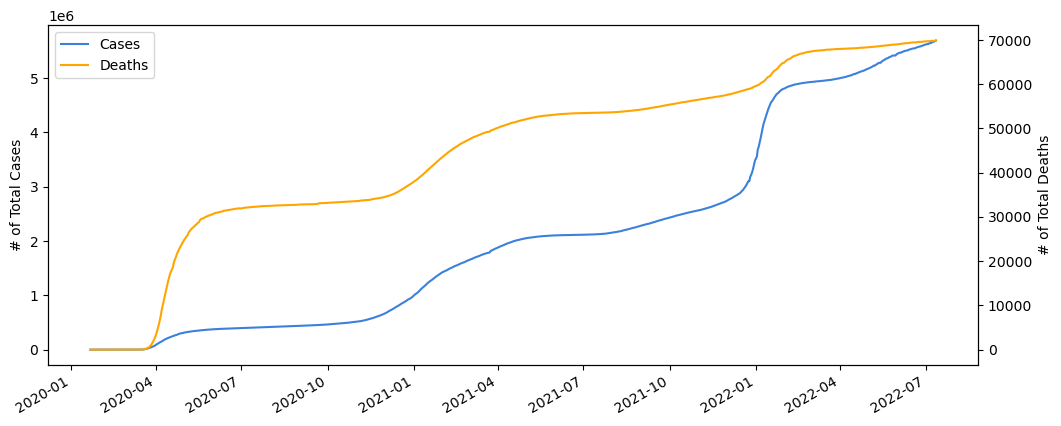

In [13]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)

In [14]:
import matplotlib.ticker as mticks

In [15]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

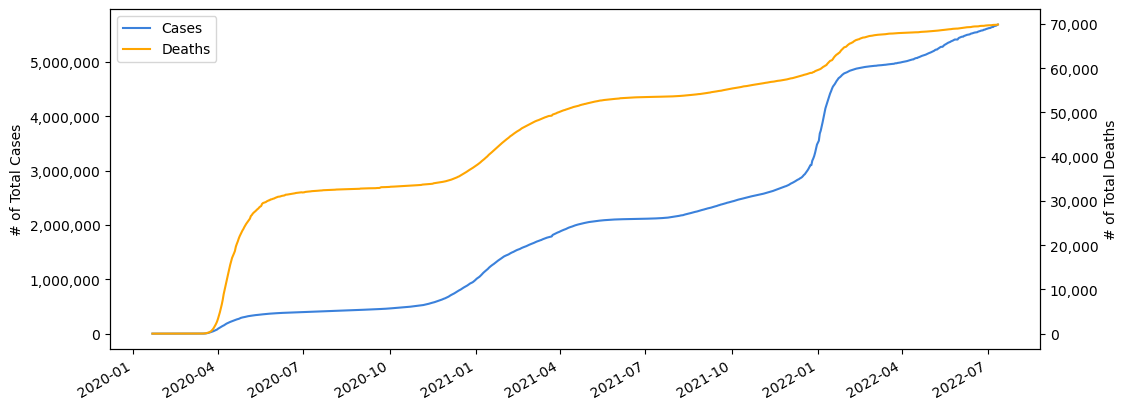

In [16]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.yaxis.set_major_formatter(str_fmt)
ax2.yaxis.set_major_formatter(str_fmt)

In [17]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

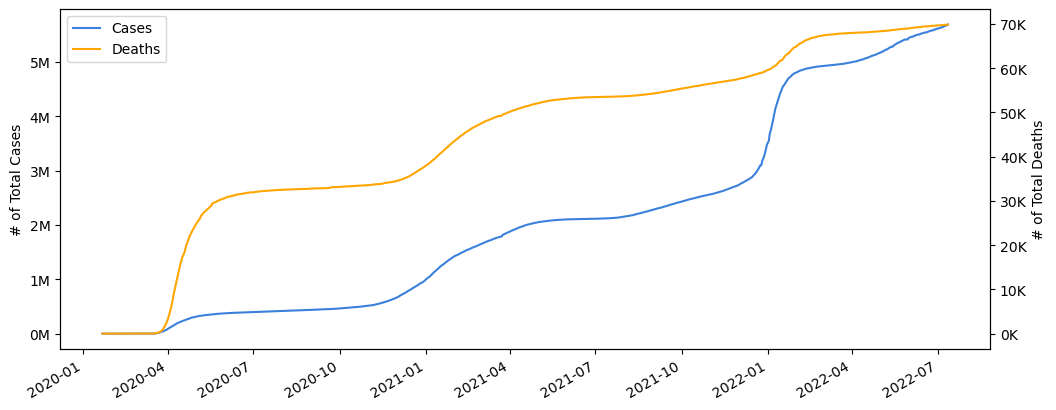

In [18]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
## Set the axis' major formatter
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)

In [19]:
# create the locator to place ticks every 1 months.
#loc_3months = mdates.MonthLocator(interval=3)
#fmt_months = mdates.DateFormatter("%b")
## for major year ticks
#loc_year = mdates.YearLocator()
#fmt_year = mdates.DateFormatter("%Y")

NameError: name 'loc_3months' is not defined

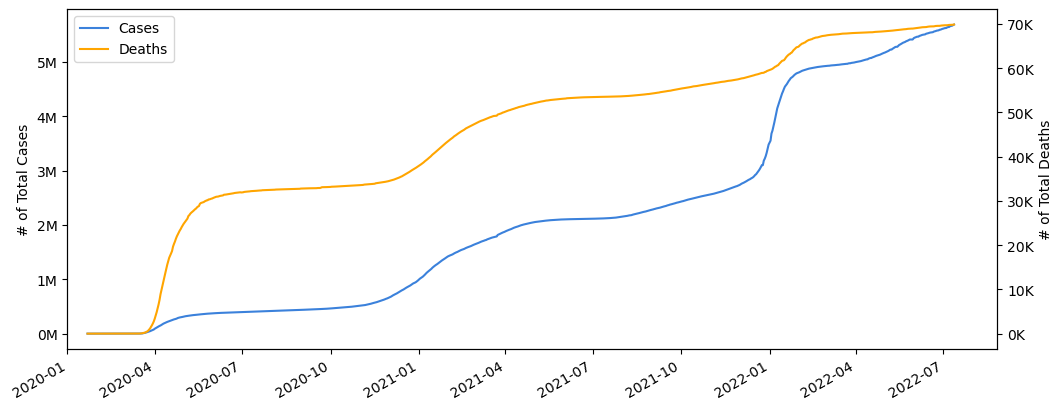

In [20]:
final_fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.set_xlim(left=pd.to_datetime('01/2020'))
## Set the y-axes major formatters
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)
## customize minor ticks
ax1.xaxis.set_minor_locator(loc_3months)
ax1.xaxis.set_minor_formatter(fmt_months)
# ## customize major ticks
ax1.xaxis.set_major_locator(loc_year)
ax1.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually different
ax1.grid(which='minor',axis='x',ls=":",lw=1)
ax1.grid(which='major',axis='x',color='k')
final_fig.autofmt_xdate(which='major',rotation=90,ha='center')

In [21]:
df_ts

cases  deaths
state_code date                      
AK         2020-01-22       0       0
           2020-01-23       0       0
           2020-01-24       0       0
           2020-01-25       0       0
           2020-01-26       0       0
...                       ...     ...
WY         2022-07-08  165619    1834
           2022-07-09  165619    1834
           2022-07-10  165619    1834
           2022-07-11  165619    1834
           2022-07-12  167386    1845

[50568 rows x 2 columns]

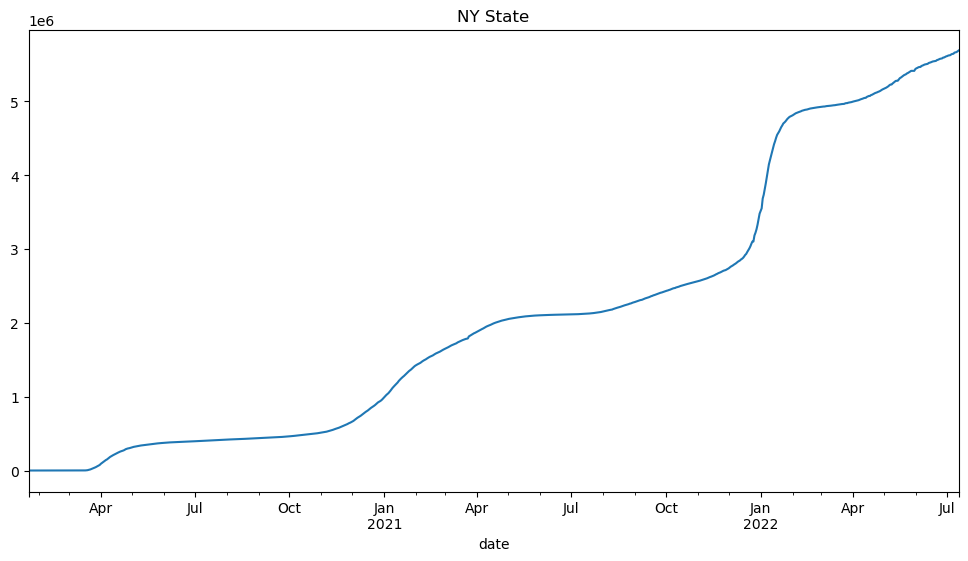

In [22]:
## quick visualization
state_code = "NY"
state_ts = df_ts.loc[state_code].copy()
axes = state_ts['cases'].plot(figsize=(12,6),title=f"{state_code} State")

In [23]:
# We can use ts.diff(), which will subtract the previous row from the next row, turning our cumulative data into New Daily Cases.
ts_diff = state_ts.diff()
ts_diff

,cases,deaths
date,,
2020-01-22,NaN,NaN
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2022-07-08,15343.0,14.0
2022-07-09,4025.0,0.0
2022-07-10,3260.0,0.0


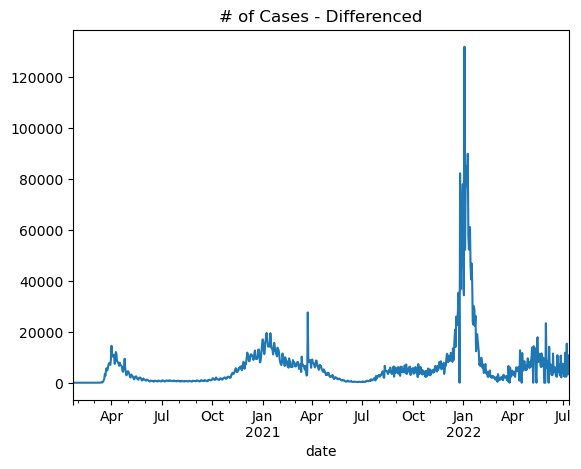

In [24]:
ax = ts_diff['cases'].plot(title='# of Cases - Differenced')

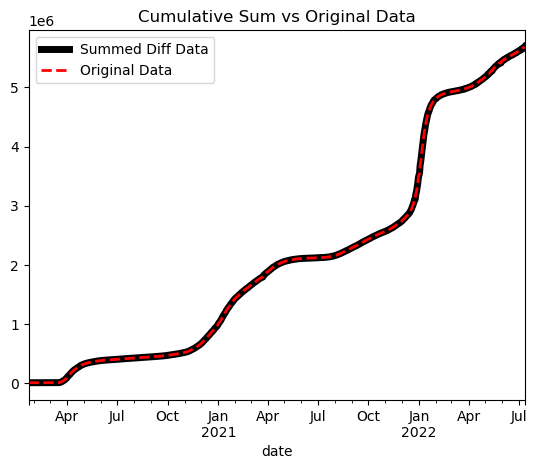

In [25]:
# Additionally, if we start with day-to-day data, we can do the opposite manipulation. We can convert new values/delta values into a cumulative total by using .cumsum()

ts_sum = ts_diff.cumsum()
ax = ts_sum['cases'].plot(title='Cumulative Sum vs Original Data',
                          label='Summed Diff Data',color='black',lw=5)
state_ts['cases'].plot(ax=ax,label='Original Data',color='red',lw=2,ls='--')
ax.legend();

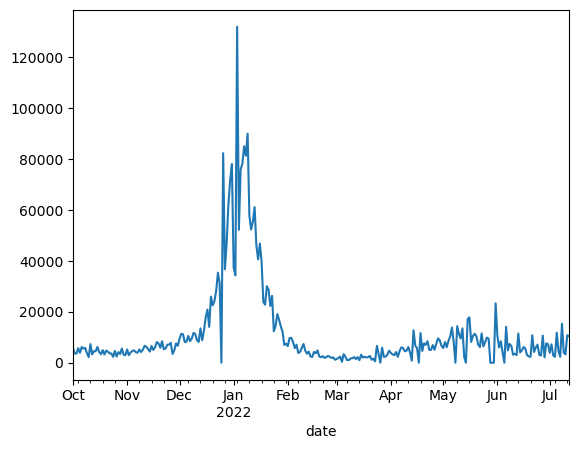

In [26]:
## selecting a single feature and smaller time period for demonstration
ts = ts_diff.loc['10/2021':'7/2022','cases'].copy().dropna()
ts.plot();

In [27]:
window = 7
ts_mean = ts.rolling(window).mean()
ts_mean

date
2021-10-01            NaN
2021-10-02            NaN
2021-10-03            NaN
2021-10-04            NaN
2021-10-05            NaN
                 ...     
2022-07-08    6626.285714
2022-07-09    6168.142857
2022-07-10    6234.428571
2022-07-11    7443.857143
2022-07-12    7248.142857
Freq: D, Name: cases, Length: 285, dtype: float64

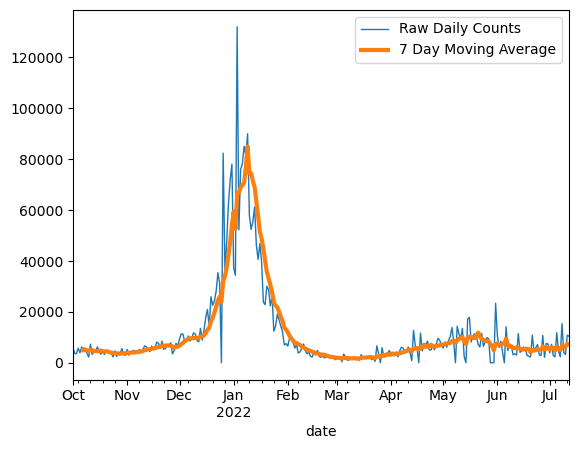

In [28]:
ax = ts.plot(label='Raw Daily Counts',lw=1)
ts_mean.plot(label=f'{window} Day Moving Average',ax=ax,lw=3)
ax.legend();

In [29]:
# we can also calculate rolling std()
std = ts.rolling(window).std()
std

date
2021-10-01            NaN
2021-10-02            NaN
2021-10-03            NaN
2021-10-04            NaN
2021-10-05            NaN
                 ...     
2022-07-08    5143.954015
2022-07-09    5223.219168
2022-07-10    5176.023276
2022-07-11    5103.509166
2022-07-12    4932.231997
Freq: D, Name: cases, Length: 285, dtype: float64

In [30]:
## calculating +/- std
ts_stats= pd.DataFrame({'mean':ts_mean,
             'mean+std':ts_mean+std,
             'mean-std':ts_mean-std})
ts_stats = ts_stats.dropna()
ts_stats

,mean,mean+std,mean-std
date,,,
2021-10-07,4897.571429,6043.555265,3751.587593
2021-10-08,4905.142857,6057.936916,3752.348798
2021-10-09,4928.857143,6051.743666,3805.970620
2021-10-10,4731.142857,6198.013270,3264.272444
2021-10-11,4958.714286,6703.903455,3213.525116
...,...,...,...
2022-07-08,6626.285714,11770.239729,1482.331700
2022-07-09,6168.142857,11391.362025,944.923689
2022-07-10,6234.428571,11410.451847,1058.405296


<Axes: xlabel='date'>

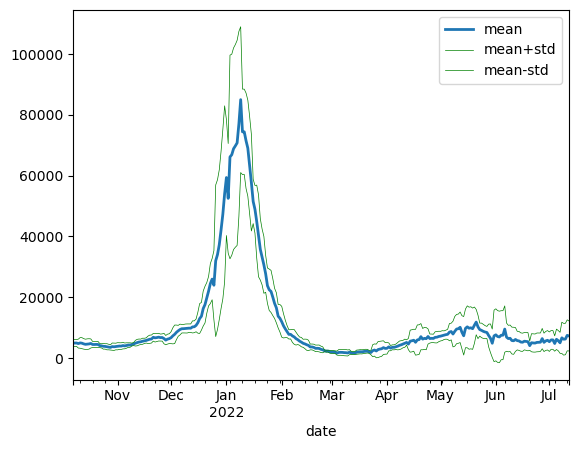

In [31]:
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ts_stats.plot(y='mean+std',color='g',lw=0.5,ax=ax)
ts_stats.plot(y='mean-std',color='g',lw=0.5,ax=ax)

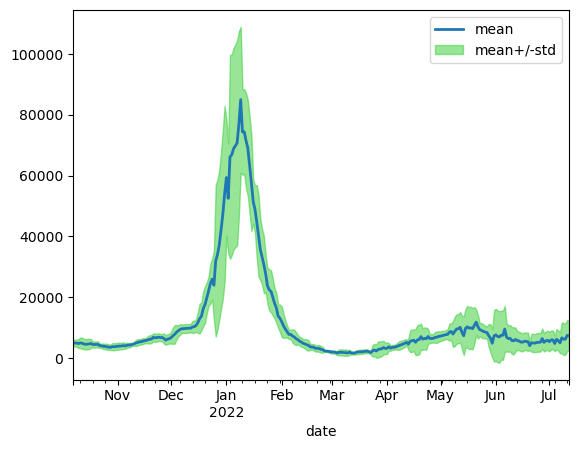

In [32]:
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ax.fill_between(ts_stats.index, ts_stats['mean+std'], ts_stats['mean-std'], color='limegreen', alpha=0.5,zorder=0,label="mean+/-std");
ax.legend();

In [33]:
# Normalizing Time Series

#Define each state's cases
ny_cases = df_ts.loc["NY",'cases']
ky_cases = df_ts.loc['KY','cases']

In [34]:
compare_ts = pd.DataFrame({'KY':ky_cases,
                          "NY":ny_cases})
compare_ts

,KY,NY
date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-07-08,1414766,5661360
2022-07-09,1414766,5665385
2022-07-10,1414766,5668645


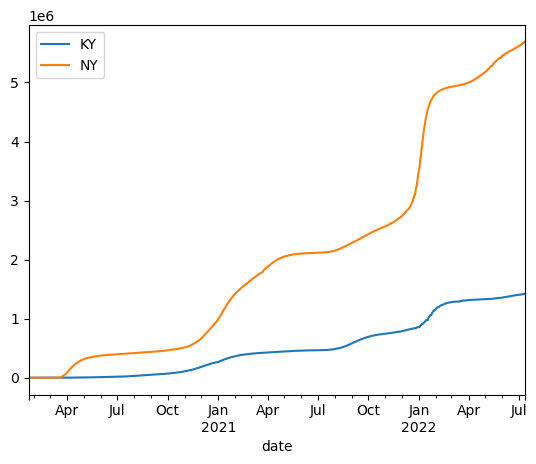

In [35]:
compare_ts.plot();

In [36]:
compare_diff = compare_ts.diff().dropna()
compare_diff

,KY,NY
date,,
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
...,...,...
2022-07-08,2143.0,15343.0
2022-07-09,0.0,4025.0
2022-07-10,0.0,3260.0


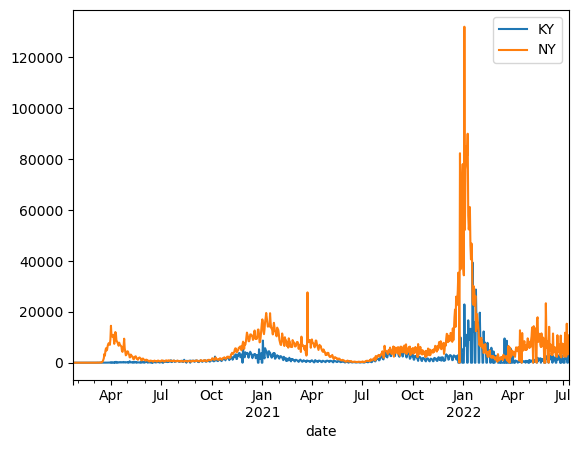

In [37]:
compare_diff.plot();

In [38]:
compare_pct = compare_ts.pct_change(freq='D')
compare_pct

,KY,NY
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
...,...,...
2022-07-08,0.001517,0.002717
2022-07-09,0.000000,0.000711
2022-07-10,0.000000,0.000575


In [39]:
compare_pct = compare_ts.pct_change(freq='D')*100
compare_pct

,KY,NY
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
...,...,...
2022-07-08,0.151704,0.271749
2022-07-09,0.000000,0.071096
2022-07-10,0.000000,0.057542


In [40]:
plot_ts = compare_pct.loc['07/2021':]
plot_ts

,KY,NY
date,,
2021-07-01,0.035041,0.018487
2021-07-02,0.034384,0.023778
2021-07-03,0.039958,0.013517
2021-07-04,0.016320,0.016539
2021-07-05,0.015888,0.017576
...,...,...
2022-07-08,0.151704,0.271749
2022-07-09,0.000000,0.071096
2022-07-10,0.000000,0.057542


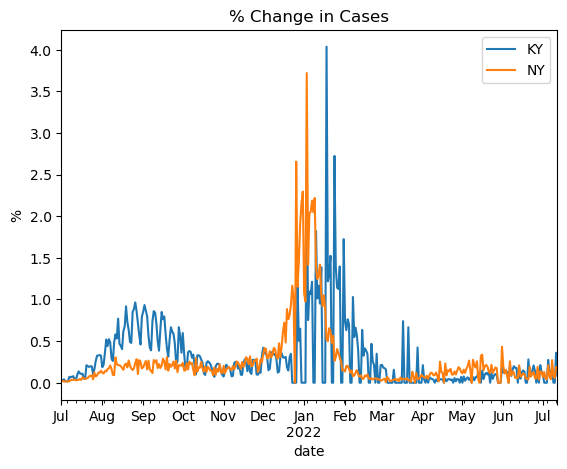

In [41]:
ax = plot_ts.plot(title='% Change in Cases',ylabel='%')

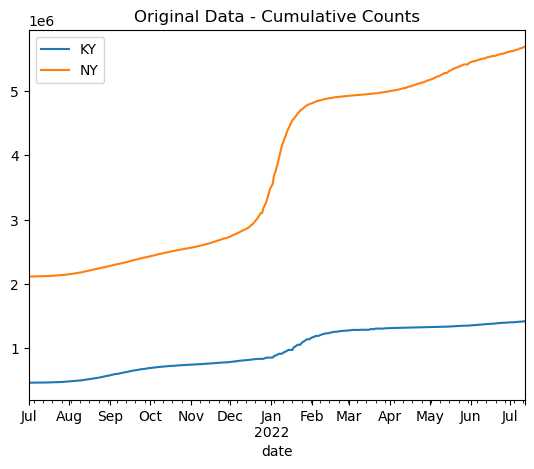

In [42]:
compare_ts.loc['07/2021':].plot(title='Original Data - Cumulative Counts');

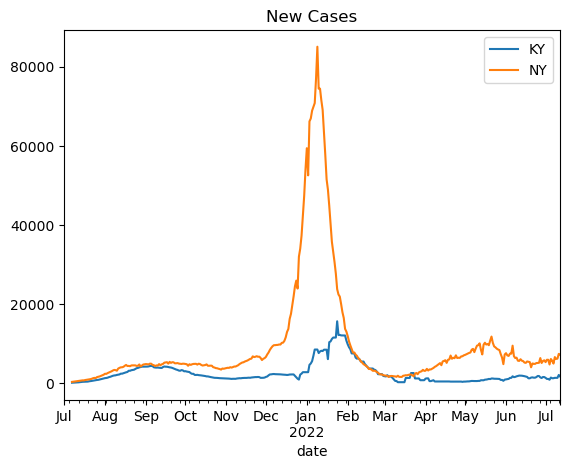

In [43]:
compare_diff.loc['07/2021':].rolling(7).mean().plot(title='New Cases');

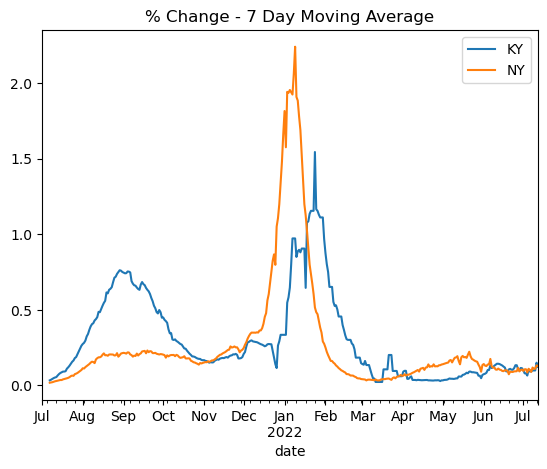

In [44]:
plot_ts = compare_pct.loc['07/2021':].rolling(window).mean()
plot_ts.plot(title='% Change - 7 Day Moving Average');

In [48]:
# Normalizing by Population
us_pop = pd.read_csv('Data/2019_Census_US_Population_Data_By_State_Lat_Long.csv')
us_pop.head()

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629


In [49]:
state_lookup = df[['state','state_code']]
state_lookup = state_lookup.drop_duplicates(subset=['state']).reset_index(drop=True)
state_lookup.head()

,state,state_code
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [50]:
## merging the us pop with our state lookup
merged_pop = pd.merge(us_pop[['STATE','POPESTIMATE2019']], state_lookup, left_on='STATE', right_on='state')
# merged_pop = merged_pop.drop(columns='state').set_index('state_code')
state_pop = merged_pop.set_index('state_code')['POPESTIMATE2019']
state_pop.head()

state_code
AL     4903185
AK      731545
AZ     7278717
AR     3017804
CA    39512223
Name: POPESTIMATE2019, dtype: int64

In [51]:
## example calc for KY
compare_ts['KY']/state_pop.loc['KY']*100_000

date
2020-01-22        0.000000
2020-01-23        0.000000
2020-01-24        0.000000
2020-01-25        0.000000
2020-01-26        0.000000
                  ...     
2022-07-08    31666.731204
2022-07-09    31666.731204
2022-07-10    31666.731204
2022-07-11    31780.795058
2022-07-12    31807.095103
Freq: D, Name: KY, Length: 903, dtype: float64

In [52]:
## preparing all columns using loop
compare_pop = compare_ts.copy()
for col in compare_ts.columns:
    compare_pop[col] =( compare_pop[col] / state_pop.loc[col])*100_000
compare_pop

,KY,NY
date,,
2020-01-22,0.000000,0.000000
2020-01-23,0.000000,0.000000
2020-01-24,0.000000,0.000000
2020-01-25,0.000000,0.000000
2020-01-26,0.000000,0.000000
...,...,...
2022-07-08,31666.731204,29101.921237
2022-07-09,31666.731204,29122.611536
2022-07-10,31666.731204,29139.369394


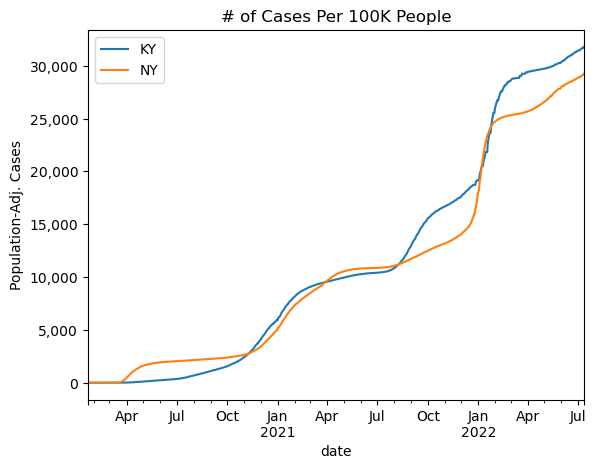

In [53]:
ax = compare_pop.plot(ylabel='Population-Adj. Cases',title='# of Cases Per 100K People');
ax.yaxis.set_major_formatter(str_fmt)